In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import requests
from pandas_datareader import data

C:\Users\Gareth\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
csv = 'owid-covid-data.csv'

In [3]:
df = pd.read_csv(csv)

## PANDAS DataAnalysis with WHO COVID19 Data

In [4]:
df

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.000,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.000,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,ZWE,Zimbabwe,2020-04-13,14,0,3,0,0.942,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11397,ZWE,Zimbabwe,2020-04-14,17,3,3,0,1.144,0.202,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11398,ZWE,Zimbabwe,2020-04-15,17,0,3,0,1.144,0.000,0.202,0.0,NaN,NaN,NaN,NaN,NaN
11399,ZWE,Zimbabwe,2020-04-16,23,6,3,0,1.547,0.404,0.202,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
count,11401.000000,11401.000000,11401.000000,11401.000000,11236.000000,11236.000000,11236.000000,11236.000000,2.083000e+03,1822.000000,2083.000000,1823.000000
mean,3064.109552,185.384879,167.676520,12.730199,194.333601,11.608349,7.105144,0.505230,8.091202e+04,5798.558727,4.303788,0.265041
std,21704.677850,1382.745007,1330.798624,105.329207,785.818422,70.616721,50.888747,3.859358,2.434716e+05,17458.515803,9.845400,0.544606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.407000e+03,276.500000,0.111000,0.015000
50%,14.000000,1.000000,0.000000,0.000000,2.097000,0.030000,0.000000,0.000000,1.558400e+04,1198.500000,0.796000,0.080000
75%,233.000000,20.000000,3.000000,0.000000,55.169000,2.684250,0.392000,0.000000,5.520350e+04,4115.000000,4.278000,0.321000
max,671331.000000,35527.000000,33284.000000,4928.000000,12552.301000,4944.376000,1119.689000,176.793000,3.242755e+06,229268.000000,111.308000,7.243000


In [6]:
df.size

182416

In [7]:
df.dtypes

iso_code                     object
location                     object
date                         object
total_cases                   int64
new_cases                     int64
total_deaths                  int64
new_deaths                    int64
total_cases_per_million     float64
new_cases_per_million       float64
total_deaths_per_million    float64
new_deaths_per_million      float64
total_tests                 float64
new_tests                   float64
total_tests_per_thousand    float64
new_tests_per_thousand      float64
tests_units                  object
dtype: object

In [8]:
pd.to_datetime(df['date'])

0       2020-03-13
1       2020-03-20
2       2020-03-24
3       2020-03-25
4       2020-03-26
           ...    
11396   2020-04-13
11397   2020-04-14
11398   2020-04-15
11399   2020-04-16
11400   2020-04-17
Name: date, Length: 11401, dtype: datetime64[ns]

In [9]:
df['iso_code'].unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CPV', 'CRI', 'CUB',
       'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM',
       'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI',
       'FLK', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GGY', 'GHA', 'GIB',
       'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JEY', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO',
       'LBN', 'LBR', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA',
       'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT',
       'MMR', 'MNE',

In [10]:
df['iso_code'].unique().size

206

In [11]:
df['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Faeroe Islands', 'Gabon',
 

In [12]:
# Earliest reported date in the database.
first_reported = df[df['date'] == df['date'].min()]

first_reported[first_reported['total_cases'] > 0]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
2014,CHN,China,2019-12-31,27,27,0,0,0.019,0.019,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [13]:
first_reported.location.unique().size

66

In [14]:
latest_report = df[df['date'] == df['date'].max()]
latest_report.location.unique().size

205

In [15]:
df = df.fillna(0)

In [16]:
df['total_tests_per_thousand'].mode()

0    0.0
dtype: float64

In [17]:
df['total_tests_per_thousand'].mean()

0.7863161126217015

## Analysis of Min Max of Different Parameters

### Tests per thousand, best country.

In [18]:
df[df['total_tests_per_thousand'] == df['total_tests_per_thousand'].max()]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
5470,ISL,Iceland,2020-04-16,1727,7,8,0,5060.806,20.513,23.443,0.0,38204.0,818.0,111.308,2.383,units unclear


### Highest new deaths.

In [19]:
df[df['new_deaths'] == df['new_deaths'].max()]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
11001,USA,United States,2020-04-16,639664,30148,30985,4928,1932.504,91.081,93.61,14.888,0.0,0.0,0.0,0.0,0


### Highest total deaths.

In [89]:
df[df['total_deaths'] == df['total_deaths'].max()]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
11002,USA,United States,2020-04-17,671331,31667,33284,2299,2028.174,95.67,100.555,6.946,0.0,0.0,0.0,0.0,0


### Highest total cases.

In [21]:
df[df['total_cases'] == df['total_cases'].max()]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
11002,USA,United States,2020-04-17,671331,31667,33284,2299,2028.174,95.67,100.555,6.946,0.0,0.0,0.0,0.0,0


## Subsetting based on a specific date to get monthly updates.

In [24]:
april = df[df.date == '2020-04-17']

In [25]:
april_tc = april[['date','location','total_cases','total_deaths','total_tests']]
april_tc
april_tc.columns

Index(['date', 'location', 'total_cases', 'total_deaths', 'total_tests'], dtype='object')

In [26]:
march = df[df.date == '2020-03-31']

In [27]:
feb = df[df.date == '2020-02-29']

In [28]:
jan = df[df.date == '2020-01-31']

In [29]:
first_reported = df[df.date == '2019-12-31']

In [30]:
march_tc = march[['date','location','total_cases','total_deaths','total_tests']]

### Month_tc = Dataframes whereby Total_Cases, Total_Deaths and Total_Tests are subset based from a specific date.

In [31]:
# here are the total number of cases as March 31st 2020.
march_tc

,date,location,total_cases,total_deaths,total_tests
107,2020-03-31,Afghanistan,141,4,0.0
134,2020-03-31,Angola,7,2,0.0
156,2020-03-31,Anguilla,2,0,0.0
196,2020-03-31,Albania,223,12,0.0
231,2020-03-31,Andorra,370,8,0.0
...,...,...,...,...,...
11133,2020-03-31,British Virgin Islands,3,0,0.0
11265,2020-03-31,Vietnam,229,0,0.0
11325,2020-03-31,South Africa,1326,3,41072.0
11355,2020-03-31,Zambia,35,0,0.0


In [32]:
# here are the total number of cases as Feb 29th 2020.
feb_tc = feb[['date','location','total_cases','total_deaths','total_tests']]

In [33]:
feb_tc

,date,location,total_cases,total_deaths,total_tests
86,2020-02-29,Afghanistan,1,0,0.0
309,2020-02-29,United Arab Emirates,19,0,0.0
454,2020-02-29,Armenia,0,0,0.0
583,2020-02-29,Australia,25,0,0.0
692,2020-02-29,Austria,7,0,1649.0
...,...,...,...,...,...
10157,2020-02-29,Sweden,12,0,0.0
10471,2020-02-29,Thailand,42,0,0.0
10718,2020-02-29,Taiwan,39,1,0.0
10954,2020-02-29,United States,66,0,18.0


In [34]:
jan_tc = jan[['date','location','total_cases','total_deaths','total_tests']]
jan_tc

,date,location,total_cases,total_deaths,total_tests
57,2020-01-31,Afghanistan,0,0,0.0
280,2020-01-31,United Arab Emirates,4,0,0.0
425,2020-01-31,Armenia,0,0,0.0
554,2020-01-31,Australia,7,0,0.0
663,2020-01-31,Austria,0,0,0.0
...,...,...,...,...,...
10128,2020-01-31,Sweden,0,0,0.0
10442,2020-01-31,Thailand,14,0,0.0
10689,2020-01-31,Taiwan,9,0,0.0
10925,2020-01-31,United States,6,0,0.0


In [35]:
first_reported_tc = first_reported[['date','location','total_cases','total_deaths','total_tests']]
first_reported_tc

,date,location,total_cases,total_deaths,total_tests
26,2019-12-31,Afghanistan,0,0,0.0
249,2019-12-31,United Arab Emirates,0,0,0.0
394,2019-12-31,Armenia,0,0,0.0
523,2019-12-31,Australia,0,0,0.0
632,2019-12-31,Austria,0,0,0.0
...,...,...,...,...,...
10097,2019-12-31,Sweden,0,0,0.0
10411,2019-12-31,Thailand,0,0,0.0
10658,2019-12-31,Taiwan,0,0,0.0
10894,2019-12-31,United States,0,0,0.0


In [36]:
first_reported_tc[first_reported_tc['total_cases'] > 0 ]

,date,location,total_cases,total_deaths,total_tests
2014,2019-12-31,China,27,0,0.0


### Testing of Stockmarket Module of Pandas

In [37]:
start_date = '2016-12-31'
end_date = '2020-04-19'
panel_data = data.DataReader('^IBEX', 'yahoo', start_date, end_date)

In [38]:
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,9552.099609,9438.799805,9448.299805,9494.700195,280878700.0,9494.700195
2017-01-04,9538.400391,9424.099609,9522.099609,9462.900391,238018000.0,9462.900391
2017-01-05,9507.200195,9413.599609,9427.900391,9488.200195,221279300.0,9488.200195
2017-01-06,9515.900391,9451.200195,9487.000000,9515.900391,144566300.0,9515.900391
2017-01-09,9536.900391,9446.200195,9536.900391,9492.799805,194378000.0,9492.799805
...,...,...,...,...,...,...
2020-04-09,7116.799805,6918.700195,7049.299805,7070.600098,240348600.0,7070.600098
2020-04-14,7209.700195,7080.299805,7209.700195,7108.600098,259986200.0,7108.600098
2020-04-15,7086.799805,6816.399902,7065.600098,6839.500000,289924500.0,6839.500000


### Subsetting of Spain from overall Dataframe, useful for specific market analysis?

In [39]:
spain = df[df['location'] == 'Spain']

In [40]:
spain

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
3320,ESP,Spain,2019-12-31,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0
3321,ESP,Spain,2020-01-01,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0
3322,ESP,Spain,2020-01-02,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0
3323,ESP,Spain,2020-01-03,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0
3324,ESP,Spain,2020-01-04,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,ESP,Spain,2020-04-13,166019,4167,16972,619,3550.845,89.125,363.000,13.239,0.0,0.0,0.0,0.0,0
3425,ESP,Spain,2020-04-14,169496,3477,17489,517,3625.212,74.367,374.058,11.058,0.0,0.0,0.0,0.0,0
3426,ESP,Spain,2020-04-15,172541,3045,18056,567,3690.339,65.127,386.185,12.127,0.0,0.0,0.0,0.0,0
3427,ESP,Spain,2020-04-16,177633,5092,18579,523,3799.248,108.909,397.371,11.186,0.0,0.0,0.0,0.0,0


## Subsetting Spain dates into one DataFrame

In [41]:
spain_jan = spain[spain['date'] == '2020-01-31']
spain_feb = spain[spain['date'] == '2020-02-29']
spain_march = spain[spain['date'] == '2020-03-31']
spain_april = spain[spain['date'] == '2020-04-15']

In [42]:
spain_sets = spain[(spain['date'] == '2020-01-31')
                   & (spain['date'] == '2020-02-28')
                  & (spain['date'] == '2020-03-31')
                   & (spain['date'] == '2020-04-15')]
            

In [43]:
spain_sets

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units


In [45]:
sort = df.sort_values(by = 'total_cases', ascending = False)

In [46]:
april_top10 = sort[sort['date'] == '2020-04-17'].head(10)

## COVID19 Plots with Time

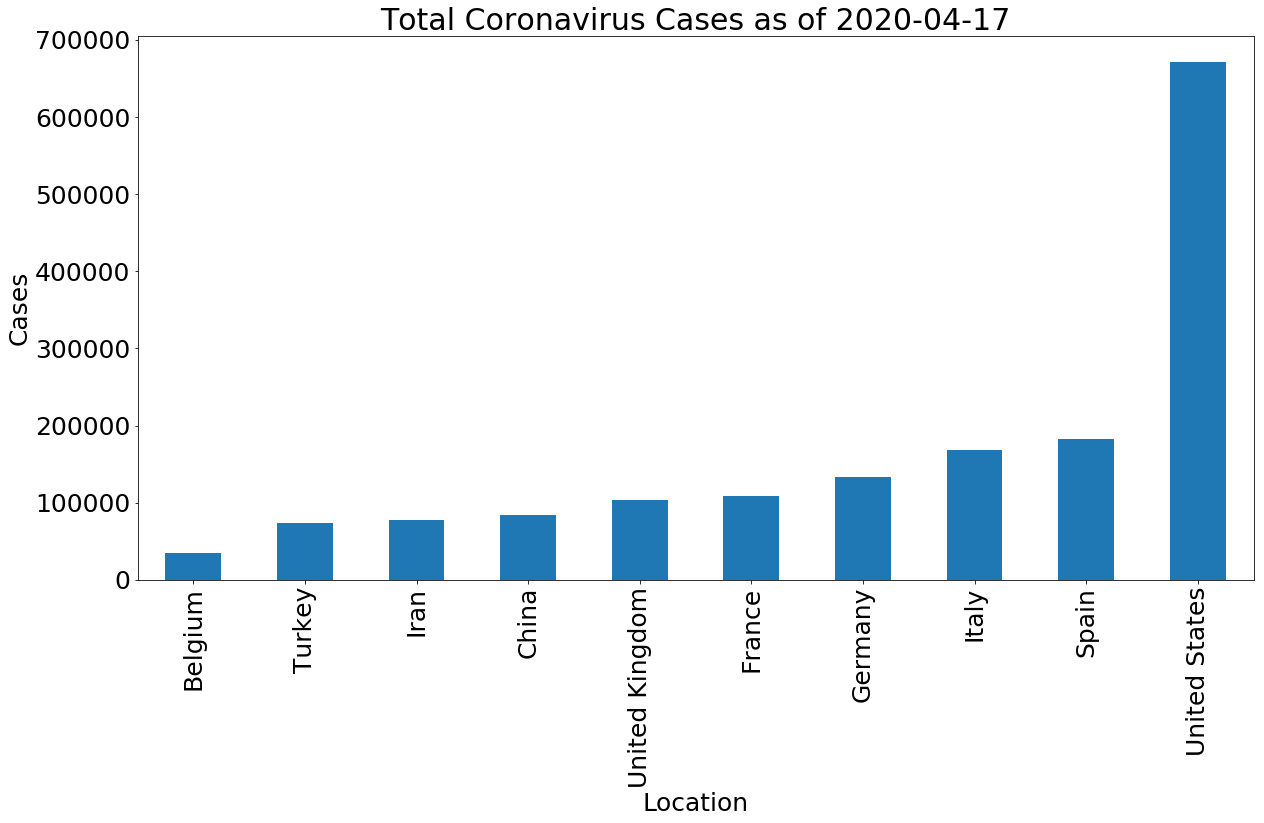

In [87]:
april_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-04-17")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-04-17.png', bbox_inches='tight')
plt.show()

In [91]:
earlyapril_top10 = sort[sort['date'] == '2020-04-08'].head(10)

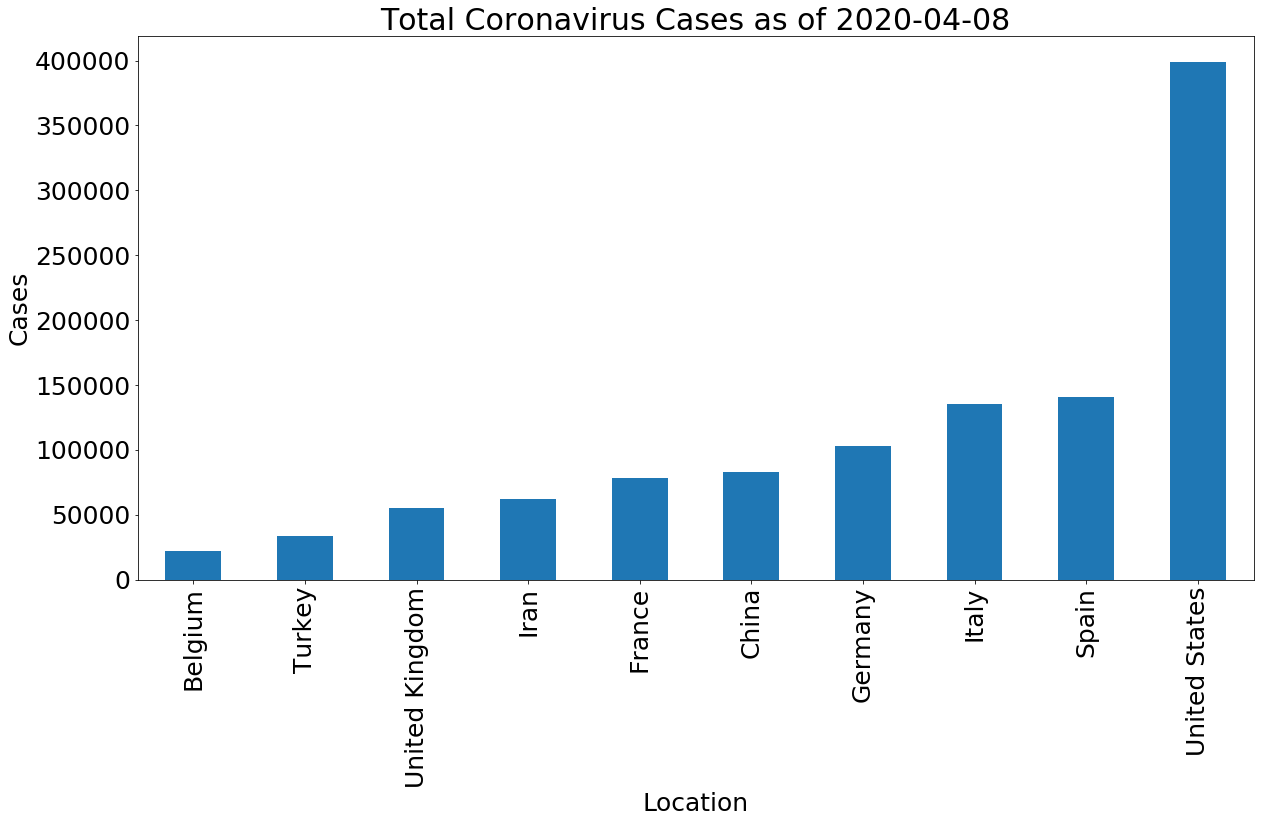

In [92]:
earlyapril_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-04-08")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-04-08.png', bbox_inches='tight')
plt.show()

In [48]:
endmarch_top10 = sort[sort['date'] == '2020-03-31'].head(10)

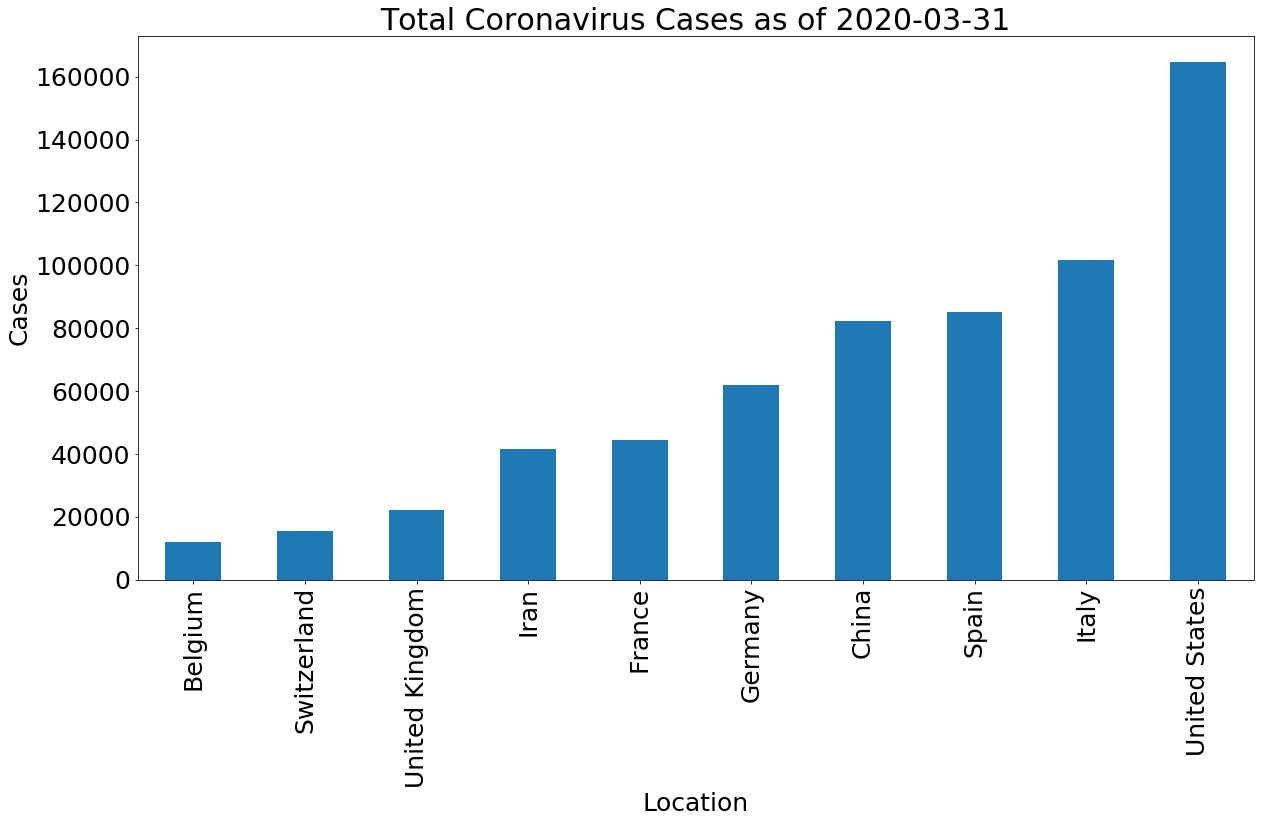

In [84]:
endmarch_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-03-31")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-03-31.png', bbox_inches='tight')
plt.show()

In [50]:
midmarch_top10 = sort[sort['date'] == '2020-03-16'].head(10)

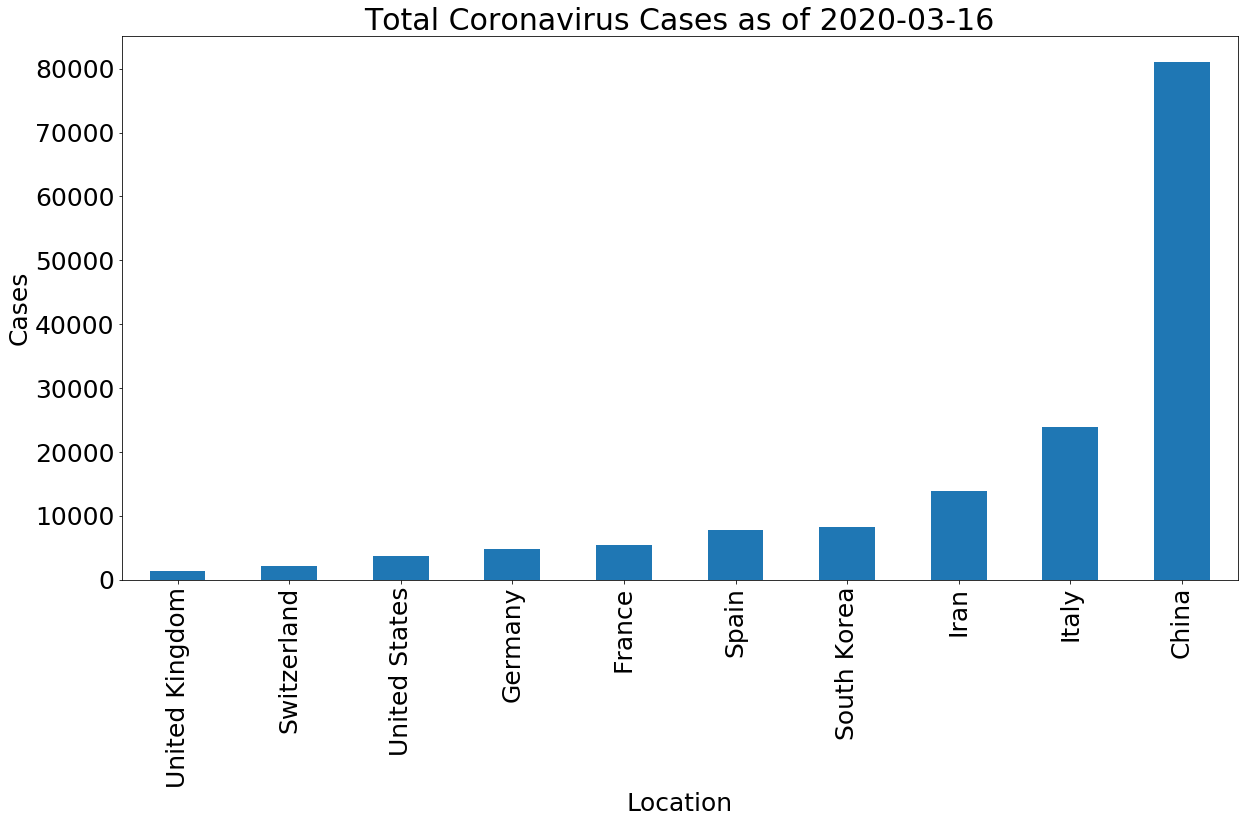

In [85]:
midmarch_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-03-16")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-03-16.png', bbox_inches='tight')
plt.show()

In [94]:
startmarch_top10 = sort[sort['date'] == '2020-03-08'].head(10)

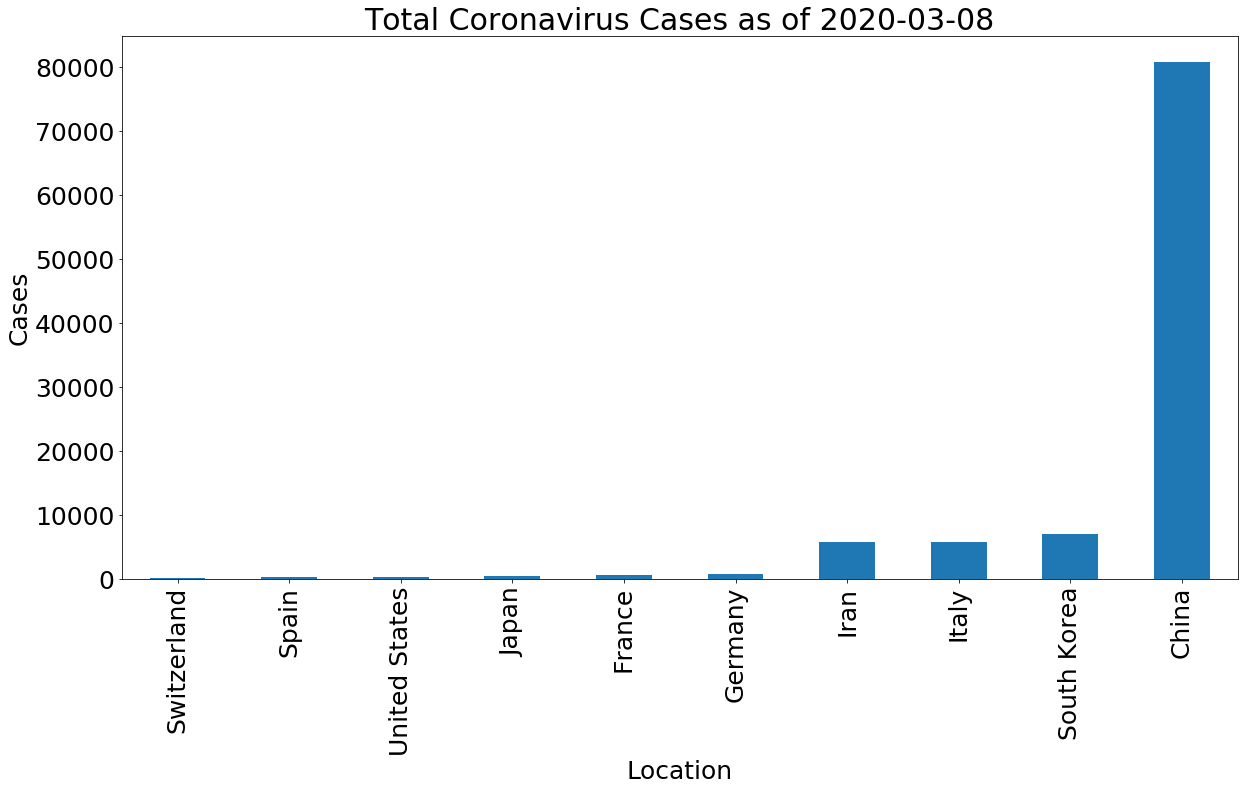

In [95]:
startmarch_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-03-08")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-03-08.png', bbox_inches='tight')
plt.show()

In [52]:
feb_top10 = sort[sort['date'] == '2020-02-29'].head(10)

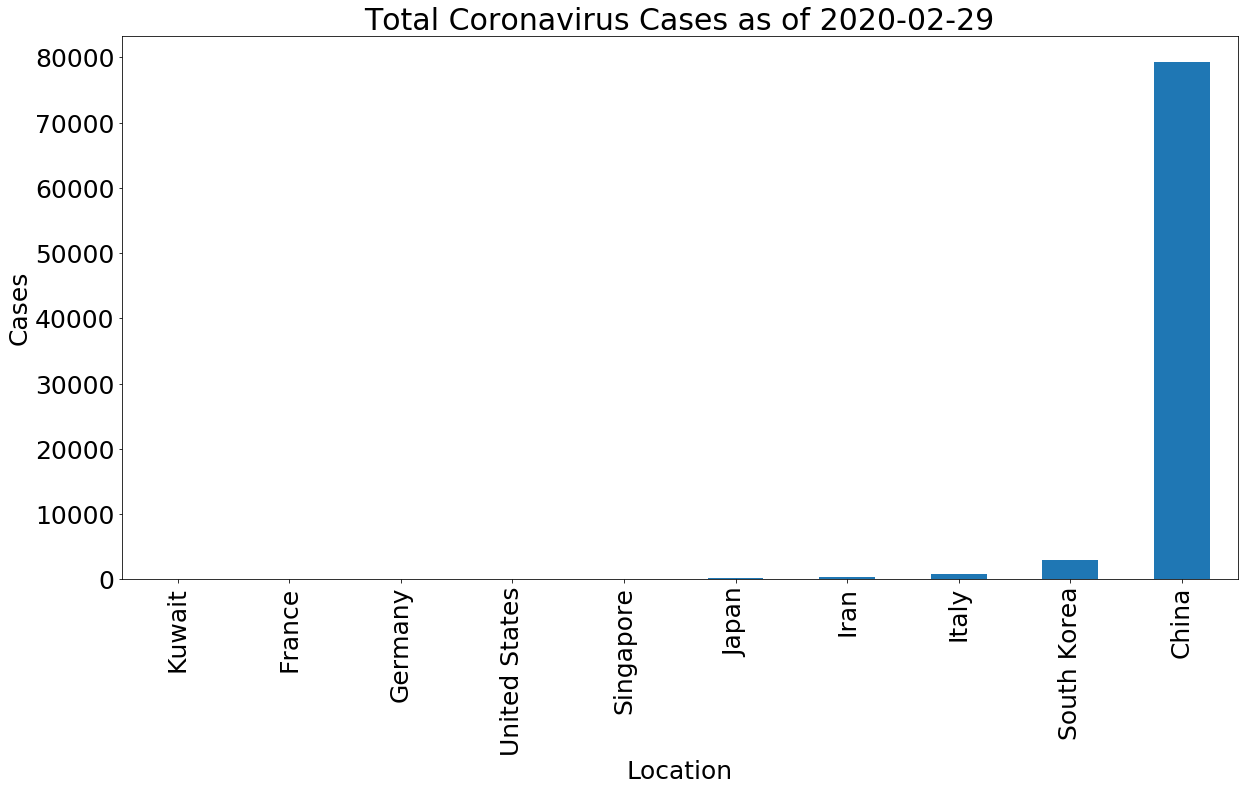

In [86]:
feb_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-02-29")
plt.xlabel("Location")
plt.ylabel("Cases")
plt.gcf().set_size_inches(20,10)
plt.savefig('2020-02-29.png', bbox_inches='tight')
plt.show()

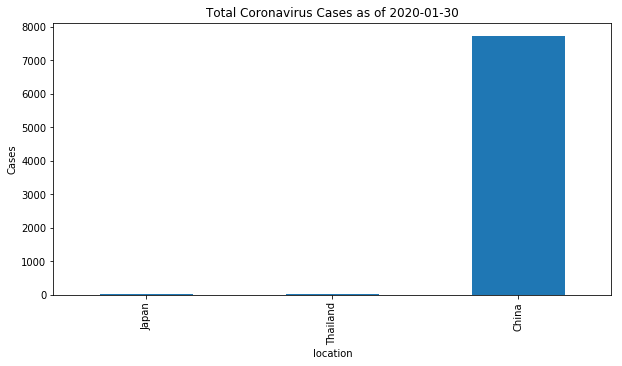

In [68]:
jan_top10 = sort[sort['date'] == '2020-01-30'].head(3)
jan_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None)
plt.gca().invert_xaxis()
plt.title("Total Coronavirus Cases as of 2020-01-30")
plt.ylabel("Cases")
plt.gcf().set_size_inches(10,5)
plt.show()